<a href="https://colab.research.google.com/github/tdiego74/PPS/blob/main/PPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Exploratorio

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. Cargar los datos
url='https://raw.githubusercontent.com/tdiego74/PPS/main/Historial_Ordenes.csv'
data = pd.read_csv(url , encoding='latin1', delimiter=';')

# 2. Mostrar todas las columnas disponibles
print("Columnas disponibles en el DataFrame:")
print(data.columns)



Columnas disponibles en el DataFrame:
Index(['Orden', 'Descripción del Grupo de Planificación',
       'Descripción de la Clase de Actividad PM',
       'Descripción del Area de Empresa', 'Área de empresa',
       'Descripción del Grupo de Códigos', 'Descripción del Código',
       'Descripción Clase de Orden', 'Descrip. del Puesto de Trabajo Resp.',
       'Descripción de la Prioridad', 'Descripción de la Ubicación / Centro',
       'Ubicación técnica', 'Status de usuario para Orden',
       'Descripción Status usuario Orden', 'Duración viaje',
       'FECHA COTIZACION ACEPTADA', 'FECHA COTIZACION INFORMADA',
       'FECHA COTIZACION RECHAZADA', 'FECHA COTIZACION SOLICITADA',
       'Fecha de creación', 'Fecha de Puesta en Ejecución',
       'FECHA FIN EJECUCION', 'FECHA FUERA DE ABONO', 'Fin deseado',
       'Indicador selección'],
      dtype='object')


<ipython-input-1-fd3dc9577cd4>:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url , encoding='latin1', delimiter=';')


In [2]:

# 3. Verificar si hay valores fuera del rango típico para fechas en Excel
print("Valores máximos y mínimos en 'Fecha de creación':", data['Fecha de creación'].min(), "-", data['Fecha de creación'].max())
print("Valores máximos y mínimos en 'FECHA FIN EJECUCION':", data['FECHA FIN EJECUCION'].min(), "-", data['FECHA FIN EJECUCION'].max())

# 4. Filtrar valores que estén fuera del rango válido para fechas
# Un rango típico de fechas en Excel sería entre 1900-01-01 (serial 1) y una fecha razonable, digamos el año 2100 (serial 73050)
valid_range = (data['Fecha de creación'] > 0) & (data['Fecha de creación'] < 73050)
data = data[valid_range]

valid_range = (data['FECHA FIN EJECUCION'] > 0) & (data['FECHA FIN EJECUCION'] < 73050)
data = data[valid_range]

# 5. Convertir los valores numéricos a fechas
data['Fecha de creación'] = pd.to_datetime(data['Fecha de creación'], origin='1899-12-30', unit='D')
data['FECHA FIN EJECUCION'] = pd.to_datetime(data['FECHA FIN EJECUCION'], origin='1899-12-30', unit='D')

# 6. Calcular el tiempo total de ejecución (en días)
data['Tiempo_ejecucion'] = (data['FECHA FIN EJECUCION'] - data['Fecha de creación']).dt.days

# 7. Verificar que las fechas y el tiempo de ejecución se hayan calculado correctamente
print(data[['Fecha de creación', 'FECHA FIN EJECUCION', 'Tiempo_ejecucion']].head())



Valores máximos y mínimos en 'Fecha de creación': 45200 - 45499
Valores máximos y mínimos en 'FECHA FIN EJECUCION': 45201.0 - 45498.0
  Fecha de creación FECHA FIN EJECUCION  Tiempo_ejecucion
0        2023-10-01          2023-12-07                67
1        2023-10-01          2023-10-03                 2
2        2023-10-02          2023-11-22                51
3        2023-10-02          2023-11-17                46
4        2023-10-02          2023-10-09                 7


.

.

.

.

.

.

.

.

#Gráfico de Barras para Ver la Distribución de Cumplimiento/Vencimiento según las Áreas de Empresa
Este gráfico te permitirá ver cómo las diferentes áreas de empresa afectan el cumplimiento o vencimiento de las órdenes.

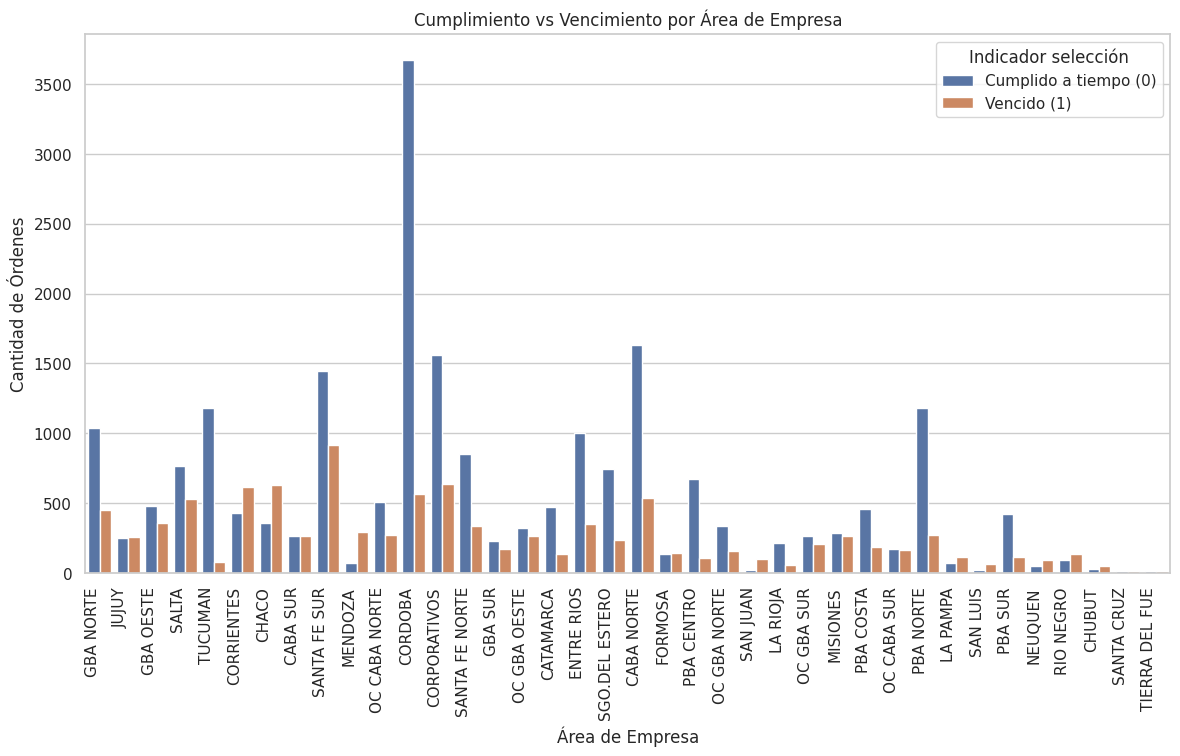

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para el cumplimiento/vencimiento por Área de Empresa
plt.figure(figsize=(14, 7))
sns.countplot(data, x='Descripción del Area de Empresa', hue='Indicador selección')
plt.title('Cumplimiento vs Vencimiento por Área de Empresa')
plt.xlabel('Área de Empresa')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=90, ha="right")
plt.legend(title='Indicador selección', loc='upper right', labels=['Cumplido a tiempo (0)', 'Vencido (1)'])
plt.show()


#Gráfico de Barras para Ver la Distribución de Cumplimiento/Vencimiento según la Prioridad
Este gráfico te ayudará a entender cómo los diferentes niveles de prioridad afectan el cumplimiento o vencimiento de las órdenes.

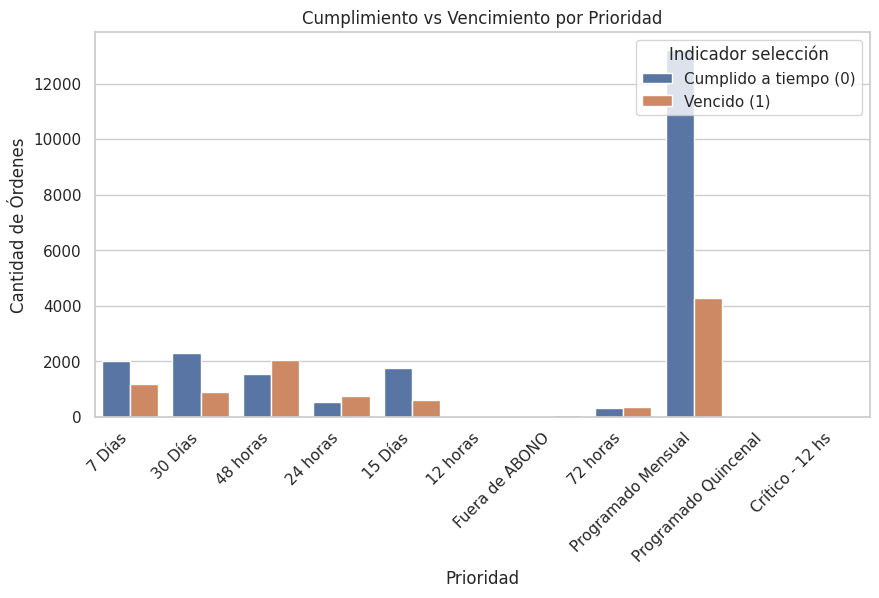

In [4]:
# Gráfico de barras para el cumplimiento/vencimiento por Prioridad
plt.figure(figsize=(10, 5))
sns.countplot(data, x='Descripción de la Prioridad', hue='Indicador selección')
plt.title('Cumplimiento vs Vencimiento por Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Indicador selección', loc='upper right', labels=['Cumplido a tiempo (0)', 'Vencido (1)'])
plt.show()


# Gráfico de Barras para la Distribución de Cumplimiento/Vencimiento según el Tipo de Actividad
Para entender la influencia de los diferentes tipos de actividades en el cumplimiento o vencimiento de las órdenes:

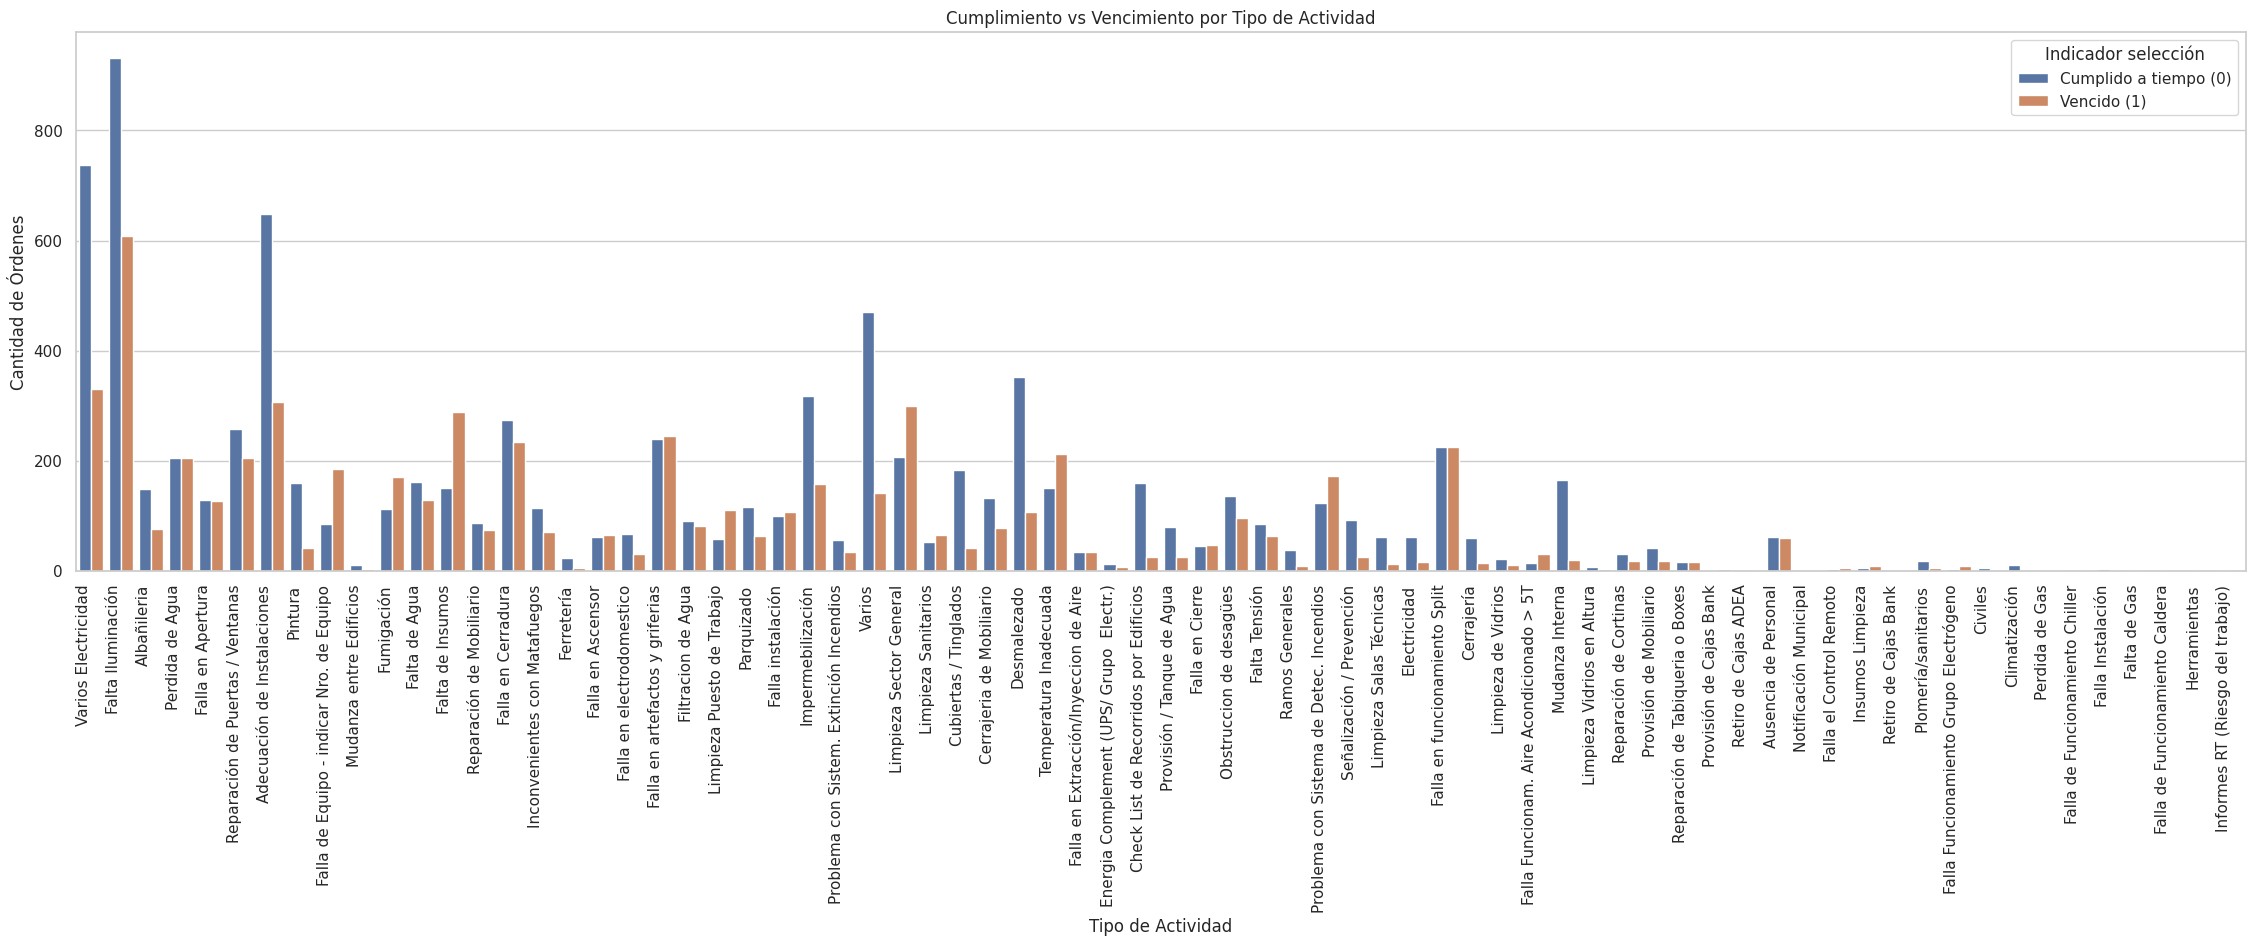

In [5]:
# Gráfico de barras para el cumplimiento/vencimiento por Tipo de Actividad
plt.figure(figsize=(28, 7))
sns.countplot(data, x='Descripción del Código', hue='Indicador selección')
plt.title('Cumplimiento vs Vencimiento por Tipo de Actividad')
plt.xlabel('Tipo de Actividad')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=90, ha="right")
plt.legend(title='Indicador selección', loc='upper right', labels=['Cumplido a tiempo (0)', 'Vencido (1)'])
plt.show()


#Gráfico de Caja (Boxplot) para Ver la Distribución del Tiempo de Ejecución según el Cumplimiento/Vencimiento
Los gráficos de caja pueden mostrar cómo varía el tiempo de ejecución entre las órdenes cumplidas a tiempo y las vencidas.

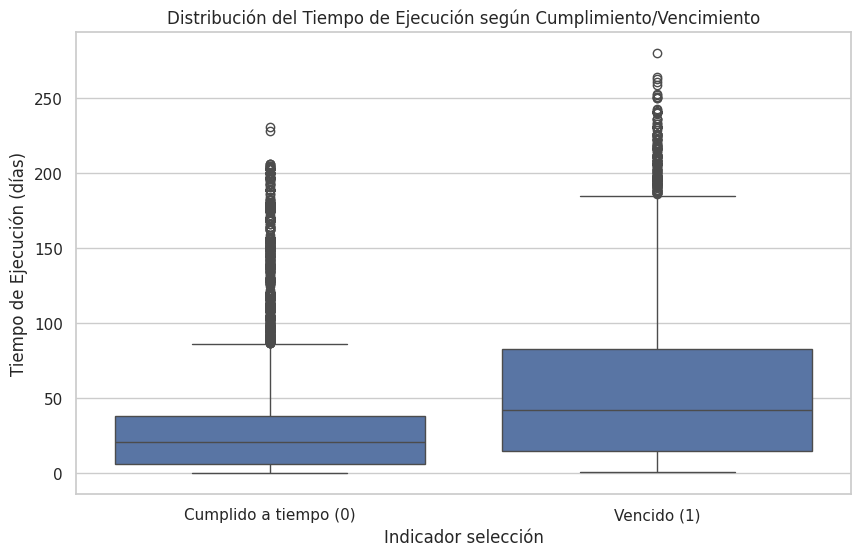

In [6]:
# Gráfico de caja para el tiempo de ejecución según el cumplimiento/vencimiento
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Indicador selección', y='Tiempo_ejecucion')
plt.title('Distribución del Tiempo de Ejecución según Cumplimiento/Vencimiento')
plt.xlabel('Indicador selección')
plt.ylabel('Tiempo de Ejecución (días)')
plt.xticks([0, 1], ['Cumplido a tiempo (0)', 'Vencido (1)'])
plt.show()


Este gráfico es un **boxplot** que muestra la **distribución del tiempo de ejecución** (en días) para órdenes de trabajo, comparando las que fueron **cumplidas a tiempo (0)** con las que **vencieron (1)**.

### Interpretación del Gráfico:

1. **Mediana**:
   - **Cumplido a tiempo (0)**: La mediana (línea central en la caja) para las órdenes cumplidas a tiempo es notablemente más baja en comparación con las vencidas.
   - **Vencido (1)**: Las órdenes que vencieron tienen una mediana considerablemente mayor, lo que indica que, en promedio, estas órdenes tomaron más tiempo en completarse.

2. **Rango Intercuartílico (IQR)**:
   - **Cumplido a tiempo (0)**: La caja (IQR) es más corta, lo que indica que la mayoría de las órdenes cumplidas a tiempo tienen tiempos de ejecución más consistentes y concentrados dentro de un rango más estrecho.
   - **Vencido (1)**: La caja es más alta, lo que muestra una mayor dispersión en los tiempos de ejecución para las órdenes vencidas. Esto sugiere que los tiempos de ejecución son más variables para estas órdenes.

3. **Outliers**:
   - Ambos grupos presentan outliers (puntos por encima de las líneas de los bigotes), pero son más prominentes y numerosos en el grupo de órdenes vencidas. Esto indica que algunas órdenes que vencieron tomaron significativamente más tiempo que el promedio, lo que podría ser un foco de análisis para identificar causas específicas.

4. **Bigotes**:
   - Los bigotes (líneas que se extienden desde las cajas) son más largos para las órdenes vencidas, lo que refuerza la idea de que el tiempo de ejecución es más variable y generalmente más largo para las órdenes que no se cumplieron a tiempo.

### Conclusión:

Este gráfico sugiere que existe una clara diferencia en los tiempos de ejecución entre las órdenes que se cumplen a tiempo y las que vencen. Las órdenes que vencen tienden a tomar más tiempo para completarse, con una mayor variabilidad en esos tiempos, y presentan casos extremos donde el tiempo de ejecución es particularmente prolongado. Estos hallazgos pueden indicar que, para evitar el vencimiento de órdenes, es crucial enfocarse en reducir el tiempo de ejecución, especialmente para aquellas órdenes que presentan una alta variabilidad y tiempos extremadamente largos.

# Mapa de Calor para Ver la Correlación entre las Variables Numéricas
El mapa de calor es útil para visualizar la correlación entre las diferentes variables numéricas, incluyendo el indicador de cumplimiento.

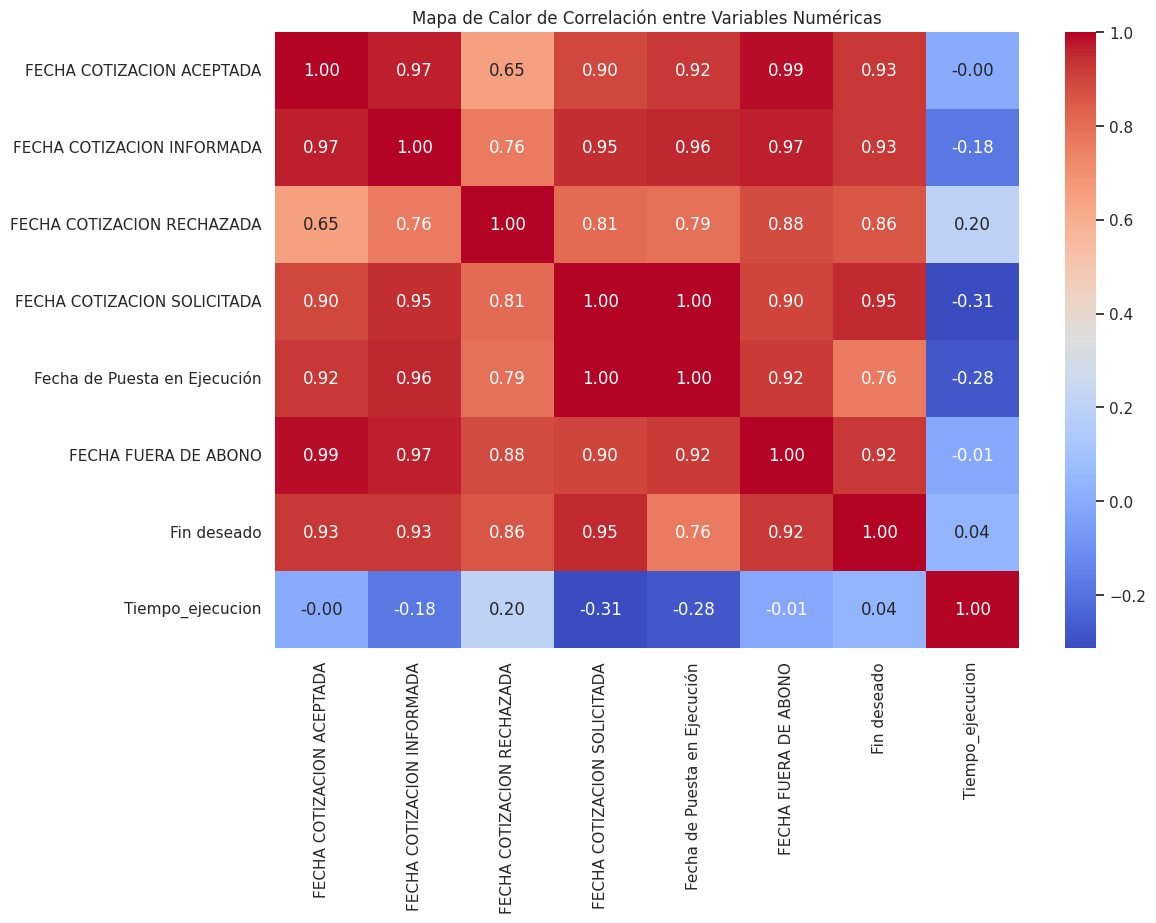

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
df_numeric = data.select_dtypes(include=['float64', 'int64'])

# Crear un mapa de calor para ver las correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


### Análisis del Mapa de Calor

El mapa de calor  muestra las correlaciones entre varias variables numéricas en tu dataset. Algunas conclusiones y observaciones que se pueden sacar de este análisis:

1. **Correlaciones Altas entre Fechas de Cotización:**
   - **FECHA COTIZACION ACEPTADA, INFORMADA, SOLICITADA, y FUERA DE ABONO** están altamente correlacionadas entre sí (valores entre 0.90 y 1.00).
   - Esto sugiere que estas fechas están muy relacionadas o podrían estar muy cerca en el tiempo en la mayoría de los casos. Es posible que estos eventos ocurran en secuencia, lo que causa que estén muy correlacionados.

2. **Baja Correlación con `'Tiempo_ejecucion'`:**
   - El `'Tiempo_ejecucion'` muestra baja correlación con la mayoría de las otras variables, con valores de correlación muy bajos (cerca de 0). Esto indica que la duración de la ejecución no está fuertemente relacionada con las fechas de cotización o con otras variables.
   - Esto podría sugerir que el tiempo de ejecución es una variable relativamente independiente o que no está directamente influenciada por los eventos registrados en las otras fechas.

### Conclusión General

Las correlaciones entre las variables numéricas muestran que muchas de las fechas de cotización están altamente correlacionadas, lo que podría reflejar un proceso en el que estas acciones ocurren en secuencia y de manera predecible. Por otro lado, el `'Tiempo_ejecucion'` parece estar bastante independiente de estas fechas, lo que puede indicar que factores adicionales (no numéricos en este dataset) podrían estar influyendo en la duración de las órdenes.

#Entrenamiento Modelo ML y Rendimiento

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. Cargar los datos
url='https://raw.githubusercontent.com/tdiego74/PPS/main/Historial_Ordenes.csv'
data = pd.read_csv(url , encoding='latin1', delimiter=';')

# 1. Cargar los datos
#data = pd.read_csv('Historial_OT.csv', encoding='latin1', delimiter=';')

# 2. Seleccionar las columnas relevantes para el modelo
columns = ['Descripción del Grupo de Planificación', 'Descripción de la Clase de Actividad PM',
           'Área de empresa', 'Descripción del Grupo de Códigos',
           'Descripción del Código', 'Descripción Clase de Orden',
           'Descrip. del Puesto de Trabajo Resp.', 'Descripción de la Prioridad',
           'Descripción de la Ubicación / Centro', 'Ubicación técnica',
           'Indicador selección']

# 3. Crear un DataFrame con las columnas seleccionadas
df = data[columns].copy()

# 4. Convertir los valores de 'Indicador selección' ('+' a 0 y '-' a 1)
df['Indicador selección'] = df['Indicador selección'].apply(lambda x: 1 if x == '-' else 0)

# 5. Eliminar filas con datos NaN
df.dropna(inplace=True)

# 6. Convertir las variables categóricas en variables numéricas utilizando codificación one-hot
df = pd.get_dummies(df, drop_first=True)

# 7. Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Indicador selección'])
y = df['Indicador selección']

# 8. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



<ipython-input-9-bc866bb4f7b5>:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url , encoding='latin1', delimiter=';')


In [10]:
# Crear y entrenar el modelo Logistic Regression
from sklearn.linear_model import LogisticRegression

# Entrenamiento
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7649293099810086
ROC AUC Score: 0.7560200687840799

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2746
           1       0.73      0.70      0.71      1993

    accuracy                           0.76      4739
   macro avg       0.76      0.76      0.76      4739
weighted avg       0.76      0.76      0.76      4739



In [11]:
# Crear y entrenar el modelo GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7623971301962439
ROC AUC Score: 0.7494321896484746

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2746
           1       0.74      0.67      0.70      1993

    accuracy                           0.76      4739
   macro avg       0.76      0.75      0.75      4739
weighted avg       0.76      0.76      0.76      4739



In [12]:
# Crear y entrenar el modelo XGBClassifier
from xgboost import XGBClassifier

# Entrenamiento
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.766195399873391
ROC AUC Score: 0.757043771919855

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2746
           1       0.73      0.70      0.72      1993

    accuracy                           0.77      4739
   macro avg       0.76      0.76      0.76      4739
weighted avg       0.77      0.77      0.77      4739



In [13]:
# Crear y entrenar el modelo AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Realizar predicciones
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7501582612365478
ROC AUC Score: 0.7370139077448419

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      2746
           1       0.72      0.65      0.69      1993

    accuracy                           0.75      4739
   macro avg       0.75      0.74      0.74      4739
weighted avg       0.75      0.75      0.75      4739



In [ ]:
# Crear y entrenar un modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Entrenamiento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# 11. Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.785958904109589
ROC AUC Score: 0.7769735188308132

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      2009
           1       0.77      0.72      0.74      1495

    accuracy                           0.79      3504
   macro avg       0.78      0.78      0.78      3504
weighted avg       0.79      0.79      0.78      3504



Accuracy: 0.785958904109589

ROC AUC Score: 0.7769735188308132

Classification Report:

                  precision    recall  f1-score   support

              0       0.80      0.84      0.82      2009
              1       0.77      0.72      0.74      1495

    accuracy                              0.79      3504
    macro avg         0.78      0.78      0.78      3504
    weighted avg      0.79      0.79      0.78      3504

#Interpretación de los resultados:
El análisis de rendimiento de varios modelos de clasificación muestra que el **RandomForestClassifier** alcanzó el mejor desempeño, con una precisión del 78.6% en la predicción de si una orden de trabajo se cerrará a tiempo o quedará vencida. Este modelo también logró un puntaje ROC AUC de 0.777, lo que indica una excelente capacidad para discriminar entre órdenes cumplidas y vencidas. Además, el modelo identificó correctamente la mayoría de las órdenes críticas con un alto riesgo de vencimiento, logrando una precisión del 77% y una tasa de recall del 72% para las órdenes que efectivamente se vencieron. Estos resultados sugieren que el **RandomForestClassifier** es particularmente eficaz tanto en la predicción general del estado de las órdenes como en la priorización de aquellas que requieren atención urgente para evitar incumplimientos, superando en desempeño a otros modelos como el **Logistic Regression** y el **XGBClassifier** en este contexto específico.